In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress


In [ ]:
# Import API key
from api_keys import g_key

In [ ]:
from citipy import citipy
# https://pypi.org/project/citipy/ (pip install citipy)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:

# List for holding latitudes-longitudes and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=1500)
latitudes_longitudes = zip(latitudes, longitudes)

# Identify nearest city for each latitudes-longitudes combination
for everylat_lng in latitudes_longitudes:
    city = citipy.nearest_city(everylat_lng[0], everylat_lng[1]).city_name
    
    # If the city is not already present, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

In [ ]:
#Perform API Calls
cloudiness = []
country = []
date = []
humidity = []
latitude_list = []
longitude_list = []
maximum_temp = []
wind_speed = []


In [6]:
from api_keys import weather_api_key
index_counter = 0
set_counter = 1

In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [8]:
# For each city name in cities list, do below things...used exception handling
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude_list.append(response["coord"]["lat"])
        longitude_list.append(response["coord"]["lon"])
        maximum_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

Processing Record 1 of Set 1 : hilo
Processing Record 2 of Set 1 : new norfolk
Processing Record 3 of Set 1 : rikitea
Processing Record 4 of Set 1 : punta arenas
Processing Record 5 of Set 1 : east london
Processing Record 6 of Set 1 : puerto ayora
Processing Record 7 of Set 1 : longyearbyen
Processing Record 8 of Set 1 : dikson
Processing Record 9 of Set 1 : mishan
Processing Record 10 of Set 1 : narsaq
Processing Record 11 of Set 1 : tiksi
Processing Record 12 of Set 1 : hermanus
Processing Record 13 of Set 1 : ribeira grande
Processing Record 14 of Set 1 : talnakh
Processing Record 15 of Set 1 : huarmey
Processing Record 16 of Set 1 : evensk
Processing Record 17 of Set 1 : vaini
Processing Record 18 of Set 1 : provideniya
Processing Record 19 of Set 1 : buin
Processing Record 20 of Set 1 : porto novo
Processing Record 21 of Set 1 : meulaboh
Processing Record 22 of Set 1 : torbay
Processing Record 23 of Set 1 : hobart
Processing Record 24 of Set 1 : dhidhdhoo
Processing Record 25 of 

In [12]:
weather_dictionary = {
    "City": city,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": latitude_list,
    "Lng": longitude_list,
    "Max Temp": maximum_temp,
    "Wind Speed": wind_speed
}

In [13]:
weather_dataframe = pd.DataFrame(weather_dictionary)
weather_dataframe.head(10)
weather_dataframe.to_csv("weather_df.csv", index=False)

#Plotting the Data 
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.


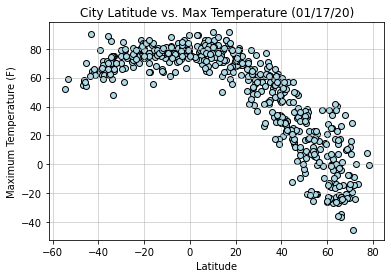

In [16]:
#Latitude vs. Temperature Plot
plt.scatter(weather_dictionary["Lat"], weather_dictionary["Max Temp"], facecolor = "lightblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (01/17/20)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
# Save the plotted figure as .pngs
plt.savefig("Latitude vs Max Temperature.png")


Observation- Latitude vs Max Temperature.png:
As the latitude increases, temperature drops and the maximum temp. is found around 0 latitude.

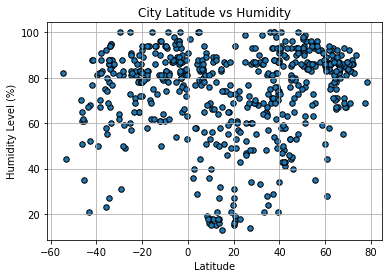

In [17]:
#Latitude vs. Humidity Plot
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Latitude vs Humidity.png")

Observation- Latitude vs Humidity:
As the latitude gets higher,humidity gets higher too

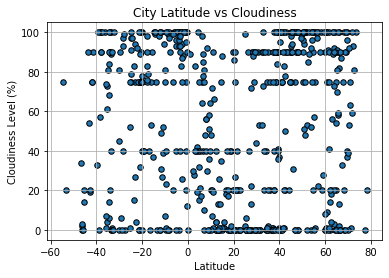

In [18]:
#Latitude vs. Cloudiness Plot
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()
plt.savefig("Latitude vs Cloudiness.png")

Observation- Latitude vs Cloudiness: Cloudiness is all over the latitude.


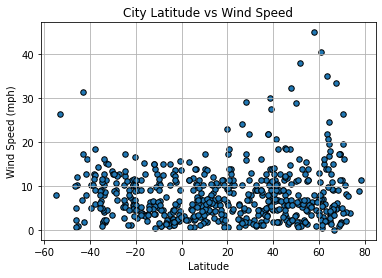

In [19]:
#Latitude vs. Wind Speed Plot
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Latitude vs Wind Speed.png")

Observation- Latitude vs Wind Speed:Wind Speed is present across the latitude


In [20]:
#Linear Regression

# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"] >= 0]
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"] < 0]

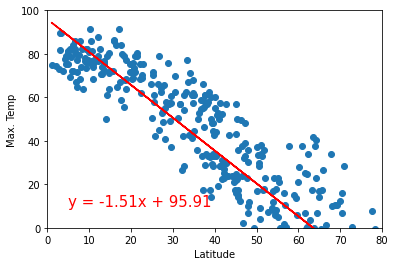

In [21]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.savefig("North Max Temp vs Latitude Regression.png")


Observation: negative correlation between latitude and Max Temperature in Northern Hemisphere

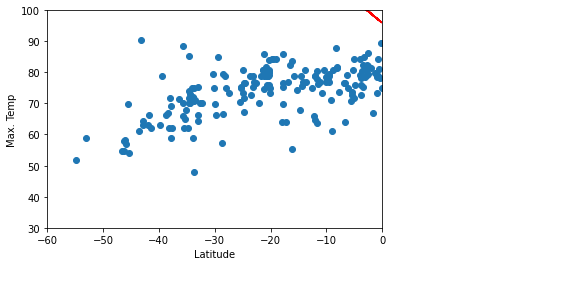

In [22]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression

#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.savefig("South Max Temp vs Latitude Regression.png")

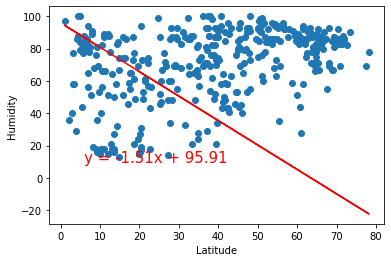

In [23]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("North Humidity vs Latitude Linear Regression.png")

Observation: Negative constant correlation


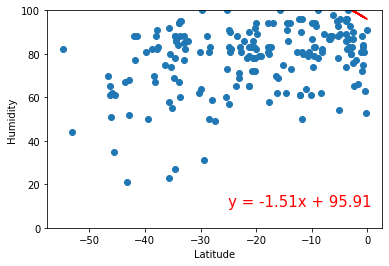

In [24]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("South  Humidity vs Latitude Linear Regression.png")

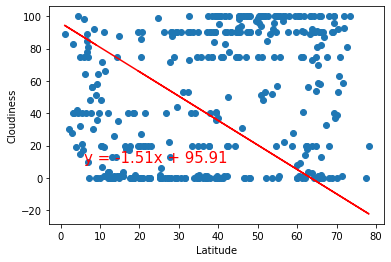

In [25]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("North  Cloudiness vs Latitude Linear Regression.png")

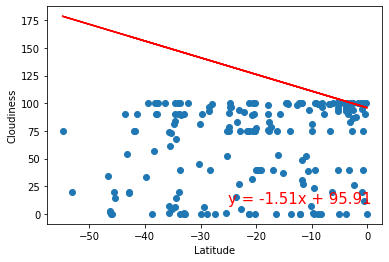

In [26]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("South  Cloudiness vs Latitude Linear Regression.png")

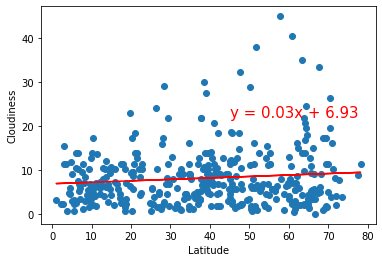

In [27]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("North  Wind speed vs Latitude Linear Regression.png")

Observation: low positive correlation